In [48]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [2]:
# set the values for 0 and build the image x axis
attractor_fp = 184 # as of 2020/10/08, average over all bead positionings so far
x_s1 = 1024*0.512-0.512*np.arange(0,1024,1) # using the Side1 camera and its pixel to height conversion of 0.512 um/Pixel


In [7]:
# load the necessary images

s1_focal = load_img_files("/data/new_trap/20201007/Bead1/HeightPictures/side1_fp_tf_1800_20.bmp")[0] # the focal image from TF with S1
attr_30_focus = load_img_files("/home/data_transfer/data_from_windows/20201007/Bead1/HeightPictures/side1_x380_y490_z30_1800_20.bmp")[0] 
attr_30_off_focus = load_img_files("/home/data_transfer/data_from_windows/20201007/Bead1/HeightPictures/side1_x350_y490_z30_1800_20.bmp")[0] 




/data/new_trap/20201007/Bead1/HeightPictures/side1_fp_tf_1800_20.bmp 0
/home/data_transfer/data_from_windows/20201007/Bead1/HeightPictures/side1_x380_y490_z30_1800_20.bmp 0
/home/data_transfer/data_from_windows/20201007/Bead1/HeightPictures/side1_x350_y490_z30_1800_20.bmp 0


In [9]:
# threshold S1 as it is easier to see the shadow


thresh_s1_focal = threshold_image(s1_focal,65,255) # filename, threshold, value to fix to. The middle part can be changed to higher or lower values as required.



In [17]:
marginalize_s1_focal =np.abs(np.mean(thresh_s1_focal [::,600:700],axis=1)-255) # slightly shifted so it is easier to see later in comparison
marginalize_attr_30_focus = np.mean(attr_30_focus[::,0:300],axis=1) # just the left part of the image is marginalized to get the best resolution on the attractor
marginalize_attr_30_off_focus = np.mean(attr_30_off_focus[::,0:300],axis=1)  # just the left part of the image is marginalized to get the best resolution on the attractor


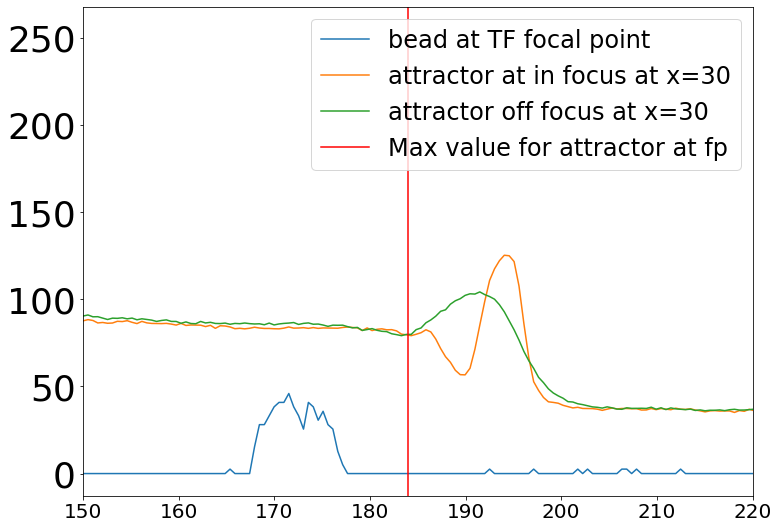

In [21]:
plt.plot(x_s1,marginalize_s1_focal, label="bead at TF focal point")
plt.plot(x_s1,marginalize_attr_30_focus, label="attractor at in focus at x=30" )
plt.plot(x_s1,marginalize_attr_30_off_focus, label="attractor off focus at x=30" )
plt.xlim(150,220)
plt.axvline(attractor_fp,label="Max value for attractor at fp",color="red")
plt.legend()
plt.show()

In [101]:
# now load an image you want to compare to this values
shield_cal = load_img_files("/home/data_transfer/data_from_windows/20201007/Bead1/HeightPictures/*shield*bmp")[2] #

/home/data_transfer/data_from_windows/20201007/Bead1/HeightPictures/shield_bead_x0V_y0V_z3V_1800_20.bmp 0
/home/data_transfer/data_from_windows/20201007/Bead1/HeightPictures/shield_bead_x0V_y0V_z5V_1800_20.bmp 1
/home/data_transfer/data_from_windows/20201007/Bead1/HeightPictures/shield_bead_x1_5V_y0V_z2V_1800_20.bmp 2
/home/data_transfer/data_from_windows/20201007/Bead1/HeightPictures/shield_bead_x0V_y0V_z2_35V_1800_20.bmp 3
/home/data_transfer/data_from_windows/20201007/Bead1/HeightPictures/shield_bead_x1V_y0V_z2_35V_1800_20.bmp 4
/home/data_transfer/data_from_windows/20201007/Bead1/HeightPictures/shield_bead_x0_5V_y0V_z2_35V_1800_20.bmp 5
/home/data_transfer/data_from_windows/20201007/Bead1/HeightPictures/shield_bead_x1_5V_y0V_z2_35V_1800_20.bmp 6


In [106]:
# marginalize this image
marginalized_shield_cal = np.mean(shield_cal[::,200:400],axis=1) # left edge, the tilt is very small and here it is the most visible


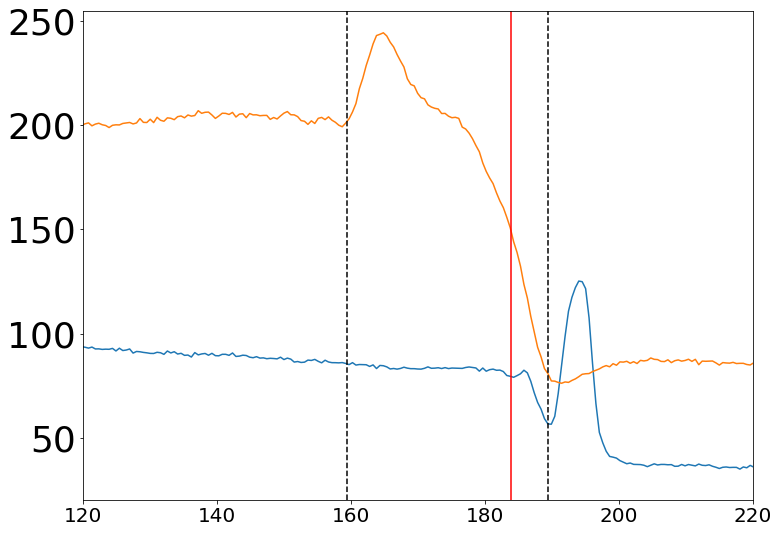

In [110]:
#plt.plot(x_s1,marginalize_s1_focal, label="bead at TF focal point")
plt.plot(x_s1,marginalize_attr_30_focus, label="attractor at in focus at x=30" )
plt.plot(x_s1,marginalized_shield_cal1, label="shield at position" )
plt.axvline(159.5,linestyle="dashed",color="black")
plt.axvline(189.5,linestyle="dashed",color="black") # get the shield boundaries

plt.xlim(120,220)
plt.axvline(attractor_fp,label="Max value for attractor at fp",color="red")
plt.show()

## 